In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import numpy as np
"""These are graphing functions for sourcetracker that are able to use the mixing proportions 
maps and are able to output 4 kinds of graphs. The original heatmap should have the color specified upon using the class.
Next is the Paired heatmap which is able to seperate each column by a heatmap of its' own. Also uses the color specified
by the general class. The stacked bar and the regular bar are exactly what they sound like with the coloring needed in list
form currently. All plots save the figure to the file pathway given and are able to change names depending on variables input.
All graphs have the ability to remove unknowns and to rename the y axis and x axis and are titled other than the paired heatmap.
When unknowns are removed all rows are redistributed to equal to 1 in total. Additionally the paired heatmap can use the 
normalized=True command to reallocate each column to sum to 1 in order to get a better idea of the proportion of the match.
Transpose on the same map can be used with normalized in order to reverse the x and y axis to show a better understanding
of the matches and the whether they are consistant."""
class ST_graphs:
    def __init__(self, mpm, title='Mixing Proportions', color='viridis'):
        self.file=mpm
        self.mpm=pd.read_table(mpm)
        self.title=title
        self.color=color
        
    def ST_heatmap(self,Unknowns=True,annot=True,xlabel='Sources',ylabel='Sinks',vmax=1.0):
        """
        Standard heat map altered for custom shape and direct png save function
        """
        prop =self.mpm.set_index('SampleID')
        if Unknowns==False :
            prop=prop.drop(['Unknown'],axis=1)
            prop=prop.div(prop.sum(axis=1), axis=0)
        fig, ax = plt.subplots(figsize=((prop.shape[1]+6),(prop.shape[0]*3/4)+4))
        sns.heatmap(prop,vmin=0.0,vmax=vmax, cmap=self.color , annot=annot, linewidths=.5,ax=ax)#,vmax=1.0
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(self.title)
        plt.xticks(rotation=45, ha='right')
        if(Unknowns==True): plt.savefig(self.file[:-4]+"_heatmap.png")
        else: plt.savefig(self.file[:-4]+"_heatmap_nounknown.png")
    
    def ST_paired_heatmap(self,normalized=False,Unknowns=True,Transpose=False, annot=True, ylabel='Sinks'):
        """
        normalized=True means that you wish to normalize each column to equal to 1 to represent the likelihood 
        that each member of the pair can be mapped its' counter out of 1
        instead of less than 1. I recommend to do this to get a better idea of the proportion. Also recommend if getting rid of
        unknowns or transposing the data.
    
        Unknown=False means to normalize this plot without the unknown column. This can help prevent notably high outliers with
        high unknowns from letting you misidentify a successful match
    
        I would recommend running both seperately and together in order to eliminate marginal cases.
    
        Any analysis should be done using a bin(n,x) distributions to better give a good idea of these distributions.
    
        Color=viridis spans from dark purple to yellow through blue and green. 
    
        Magma spans black to white through orange pink and yellow. This is slightly better in the lower mid ranges 
        and seperating on the lower end of the proportions.
    
        coolwarm is deep red to deep blue and can be good for either extreme ranges or data sets with an average of 0.
    
        Icefire is very good for middle ranges as these are darker and will better show them. 
        can be more useful if you are running into a low data issue and are getting extreme values.
        That said, usually not ideal for these maps.
    
        more can be found on these sites.
        https://seaborn.pydata.org/tutorial/color_palettes.html <-more color palattes here
        https://matplotlib.org/stable/tutorials/colors/colormaps.html  <-and here
    
        "viridis" "icefire" "mako" "magma" "coolwarm" 
    
        vmax and min will show the maximum and minimum for the heat map settings. vmax=max is default and what we use here.
        vmin=min is also what we use here but the standard version will use vmin=0 in order to show the minimum possible 
        and vmax=1.
        The reason I do not in this case is that these ranges are not particularly helpful to distinguishing the 
        successful matches to each other.
        vmin=0, vmax=1.0,
        """
        prop = self.mpm.set_index('SampleID')
        if(Unknowns==False):
            prop=prop.drop(['Unknown'],axis=1)
            prop=prop.div(prop.sum(axis=1), axis=0)
        if(normalized==True):prop=prop.div(prop.sum(axis=0), axis=1)
        if Transpose==True:
            prop=prop.T
            self.file=self.file[:-4]+'_Transposed.txt'
    
        """
        cmap=plt.cm.viridis "icefire" "vlag" "Spectral" "mako" "magma" "coolwarm" "rocket" "flare" "crest" 
        "_r" reverses all of these
        https://seaborn.pydata.org/tutorial/color_palettes.html <-more color palattes here
        https://matplotlib.org/stable/tutorials/colors/colormaps.html  <-and here
        vmin=0, vmax=1.0,
        """
        colo=self.color
        ratios,g,axes=[],[],[]
        for i in range(len(prop.columns)):
            ratios.append(1)
            axes.append("ax"+str(i))
            g.append("g"+str(i))
        ratios.append(0.08)
        axes.append("axcb")
        fig,axes=plt.subplots(1,len(axes),gridspec_kw={'width_ratios':ratios},figsize=((prop.shape[1]+6),(prop.shape[0]*3/4)+4))
        for i in range(len(prop.columns)):
            if i==0:
                g[i]=sns.heatmap(prop.iloc[:,i:i+1],vmin=0, cmap=colo ,cbar=False, annot=annot,ax=axes[i])
                g[i].set_xlabel("")
                g[i].set_ylabel(ylabel)
            elif i==len(prop.columns)-1:
                g[i]=sns.heatmap(prop.iloc[:,i:i+1],vmin=0, cmap=colo , annot=annot,ax=axes[i], cbar_ax=axes[i+1])
                g[i].set_xlabel("")
                g[i].set_ylabel("")
                g[i].set_yticks([])
                #g[i].set_title(self.title)
            else:
                g[i]=sns.heatmap(prop.iloc[:,i:i+1],vmin=0, cmap=colo ,cbar=False, annot=annot,ax=axes[i])
                g[i].set_xlabel("")
                g[i].set_ylabel("")
                g[i].set_yticks([])
        for ax in g:
            tl = ax.get_xticklabels()
            ax.set_xticklabels(tl, rotation=45)
            tly = ax.get_yticklabels()
            ax.set_yticklabels(tly, rotation=0)
        if(normalized==True):
            if(Unknowns==True):plt.savefig(self.file[:-4]+"_pairedheatmap_normalized.png")
            else:plt.savefig(self.file[:-4]+"_pairedheatmap_nounknown_normalized.png")
        else:
            if(Unknowns==True):plt.savefig(self.file[:-4]+"_pairedheatmap.png")
            else:plt.savefig(self.file[:-4]+"_pairedheatmap_nounknowns.png")
        if Transpose==True:
            self.file=self.file[:-15]+'.txt'
            
    def ST_Stacked_bar(self,Unknowns=True,x_lab="Sink",y_lab="Source Proportion", coloring=[]):
        prop = self.mpm
        if(Unknowns==False):
            prop=prop.set_index('SampleID')
            prop=prop.drop(['Unknown'],axis=1)
            prop=prop.div(prop.sum(axis=1), axis=0)
            prop=prop.reset_index()
        """
        #'#1f77b4'Blue, '#ff7f0e'Orange, '#2ca02c'Green, '#d62728'Red, 
        #'#9467bd'Purple, '#8c564b'Brown, '#e377c2'Pink, '#7f7f7f'Grey, '#bcbd22'Gold, '#17becf'Cyan
        #make sure to use contrasting colors in order better illuminate your data above are some example codes to use
        """
        if coloring!=[]:
            #my_colors={}
            #for i in range(len(prop.columns)):
                #my_colors[prop.columns[i]]=coloring[i-1]
            prop.plot(kind='bar',x=prop.columns[0], stacked=True, figsize=(10,10),
                      color=coloring)
        else:prop.plot(kind='bar',x=prop.columns[0], stacked=True, figsize=((prop.shape[1]+6),(prop.shape[0]*3/4)))
    #plt.legend(loc=(1.05, 0.5), labelspacing=-3, frameon=True)
        plt.xlabel(x_lab)
        plt.ylabel(y_lab)
        plt.title(self.title)
        plt.autoscale()
        plt.xticks(rotation=45, ha='right')
        if(Unknowns==True):plt.savefig(self.file[:-4]+"_stacked_bar.png")
        else:plt.savefig(self.file[:-4]+"_stacked_bar_nounknowns.png")
    
    def ST_bar(self,Unknowns=True,x_lab="Sink",y_lab="Source Proportion", coloring=[]):
        prop = self.mpm
        if(Unknowns==False):
            prop=prop.set_index('SampleID')
            prop=prop.drop(['Unknown'],axis=1)
            prop=prop.div(prop.sum(axis=1), axis=0)
            prop=prop.reset_index()
        """
        #'#1f77b4'Blue, '#ff7f0e'Orange, '#2ca02c'Green, '#d62728'Red, 
        #'#9467bd'Purple, '#8c564b'Brown, '#e377c2'Pink, '#7f7f7f'Grey, '#bcbd22'Gold, '#17becf'Cyan
        #make sure to use contrasting colors in order better illuminate your data above are some example codes to use
        """
        if coloring!=[]:
            prop.plot(kind='bar',x=prop.columns[0], stacked=False, figsize=((prop.shape[1]+6),(prop.shape[0]*3/4+4)),
                      color=coloring)
        else:prop.plot(kind='bar',x=prop.columns[0], stacked=False, figsize=((prop.shape[1]+6),(prop.shape[0]*3/4+4)))
        plt.xlabel(x_lab)
        plt.ylabel(y_lab)
        plt.title("Source Proportion")
        plt.autoscale()
        plt.xticks(rotation=0, ha='right')
        if(Unknowns==True):plt.savefig(self.file[:-4]+"_bar.png")
        else:plt.savefig(self.file[:-4]+"_bar_nounknowns.png")
            

In [29]:
import pandas as pd
import numpy as np
import scipy.stats as st
"""Confidence interval function for extra work"""
def confidence_intervals(table,lst=[],sink_name='Confidence Interval', alpha=0.95):
    table=table.set_index('SampleID')
    for column in table:
        interval=st.t.interval(alpha=alpha, df=len(table[column])-1,
              loc=np.mean(table[column]),
              scale=st.sem(table[column]))
        lst.append(sink_name)
        lst.append(column)
        lst.append(interval)
        #print(sink_name ,column, interval)
    return(lst)
def comparing_multiple_groups(tables,sink_names=['Confidence Interval','Confidence Interval'],mix=False, alpha=0.95):
    #mix=true when you have 2 alternating groups as sinks so that the function can seperate them into 2 different groups 
    #on the top and bottom
    Intervals=[]
    for i in tables:
#        if mix==True:
#            contents,lining=alternating_mix_prop(i)
#            Intervals=confidence_intervals(contents,sink_name=sink_names[0],alpha=alpha)
#            Intervals=confidence_intervals(lining,Intervals,sink_name=sink_names[1],alpha=alpha)
#        else:
        df=pd.read_table(i)
        Intervals=confidence_intervals(df,sink_name=sink_names,alpha=alpha)
    out=Intervals
    Intervals=[]
    return out
"""Group of mixing proportion functions for Sourcetracker in order to better apply different funtions for later plotting 
output. It is incomplete but column means, display, and alternating, are all usable in order to get the column means, show the 
data frames and split plots that have alternating groupings into two frames. I haven't finished the outputting of the data 
frames to txt files yet but I thought you might want to see what I have now."""
class mpm_functions:
    def __init__(self, table_list):
        self.tables=table_list
        self.frames=[]
        self.split=False
    
    def column_means(self):
        self.means=[]
        if self.split==False:
            for i in self.tables:
                table_mpm=pd.read_table(i)
                table_mpm=table_mpm.set_index('SampleID')
                means=table_mpm.mean(axis=0)
                #print(means)
                #print(means[0])
            self.means.append(means)
        else:
            for i in self.frames:
                table_mpm=i
                table_mpm=table_mpm.set_index('SampleID')
                means=table_mpm.mean(axis=0)
            self.means.append(means)
        #print(self.means)
    
    def alternating(self):
        #tbls_new=[]
        for i in range(len(self.tables)):
            curr_frame=pd.read_table(self.tables[i])
            tb1=pd.DataFrame(columns=curr_frame.columns)
            tb2=pd.DataFrame(columns=curr_frame.columns)
            for index, row in curr_frame.iterrows():
                if index%2==0:
                    tb1.loc[len(tb1.index)] = row
                else:
                    tb2.loc[len(tb2.index)] = row
            self.frames.append(tb1)
            self.frames.append(tb2)
        self.split=True
        #note that this needs some sort of alteration for use without the warnings
    def combine(self,row_names,column_names,means=False):
        combined=pd.DataFrame(columns=column_names)
        if self.split==False:
            if means==False:
                for k in self.tables:
                    table_mpm=pd.read_table(k)
                    for index, row in table_mpm.iterrows():
                        combined.loc[len(combined)]=row
                combined['SampleID'] = row_names
                combined=combined.set_index('SampleID')
                return combined
            else:
                for k in self.tables:
                    table_mpm=pd.read_table(k)
                    table_mpm=table_mpm.set_index('SampleID')
                    means=table_mpm.mean(axis=0)
                    combined.loc[len(combined)]=means
                combined['SampleID'] = row_names
                combined=combined.set_index('SampleID')
                return combined
        else:
            if means==False:
                for k in self.frames:
                    table_mpm=k
                    for index, row in table_mpm.iterrows():
                        combined.loc[len(combined)]=row
                combined['SampleID'] = row_names
                combined=combined.set_index('SampleID')
                return combined
            else:
                for k in self.frames:
                    table_mpm=k
                    table_mpm=table_mpm.set_index('SampleID')
                    means=table_mpm.mean(axis=0)
                    combined.loc[len(combined)]=means
                combined['SampleID'] = row_names
                combined=combined.set_index('SampleID')
                return combined
    def combine_means(self, row_names,column_names):    
        complete=self.combine(row_names,column_names,means=True)
        return complete
    def display(self):
        if self.split==False:
            for i in self.tables:
                disp=pd.read_table(i)
                display(disp)
        else:
            for i in self.frames:
                display(i)


### Change the working directory to yours

In [30]:
fecal_m_mut=ST_graphs("C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_m_mut_200.txt",
          title='Fecal Sink Male Mutant', color='magma')
fecal_f_mut=ST_graphs("C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_f_mut_200.txt",
          title='Fecal Sink Female Mutant', color='magma')
fecal_f_wt=ST_graphs("C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_f_wt_200.txt",
          title='Fecal Sink Female Wild Type', color='magma')
fecal_m_wt=ST_graphs("C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_m_wt_200.txt",
          title='Fecal Sink Male Wild Type', color='magma')

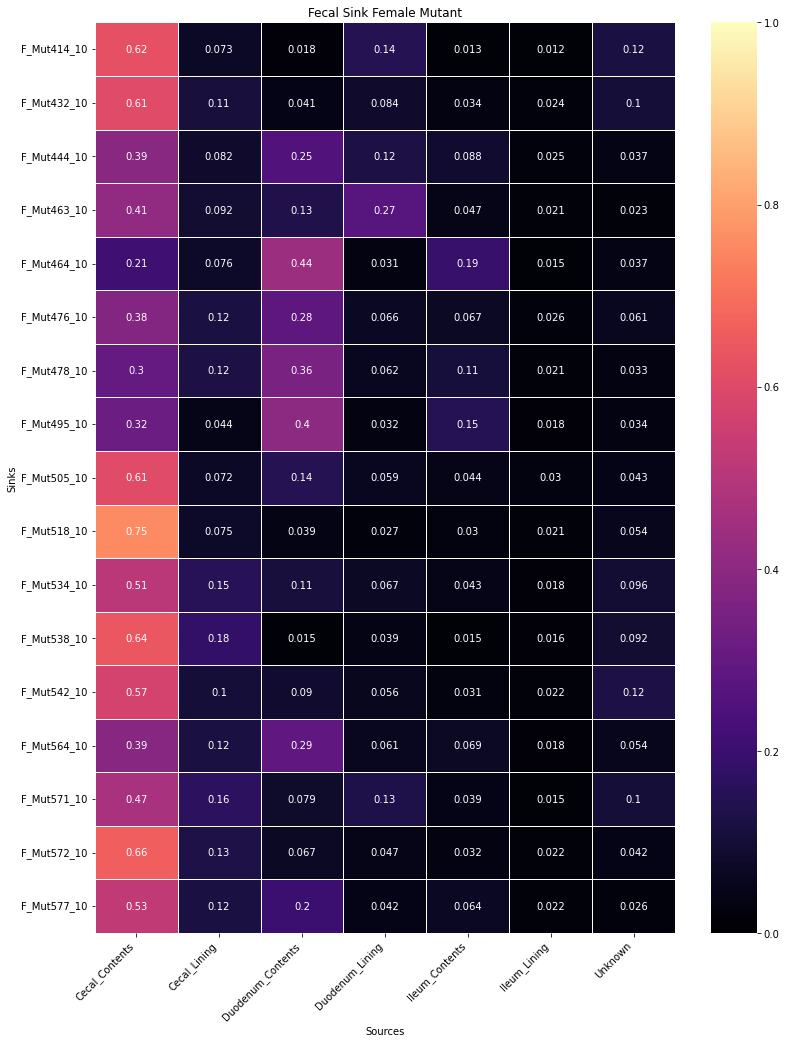

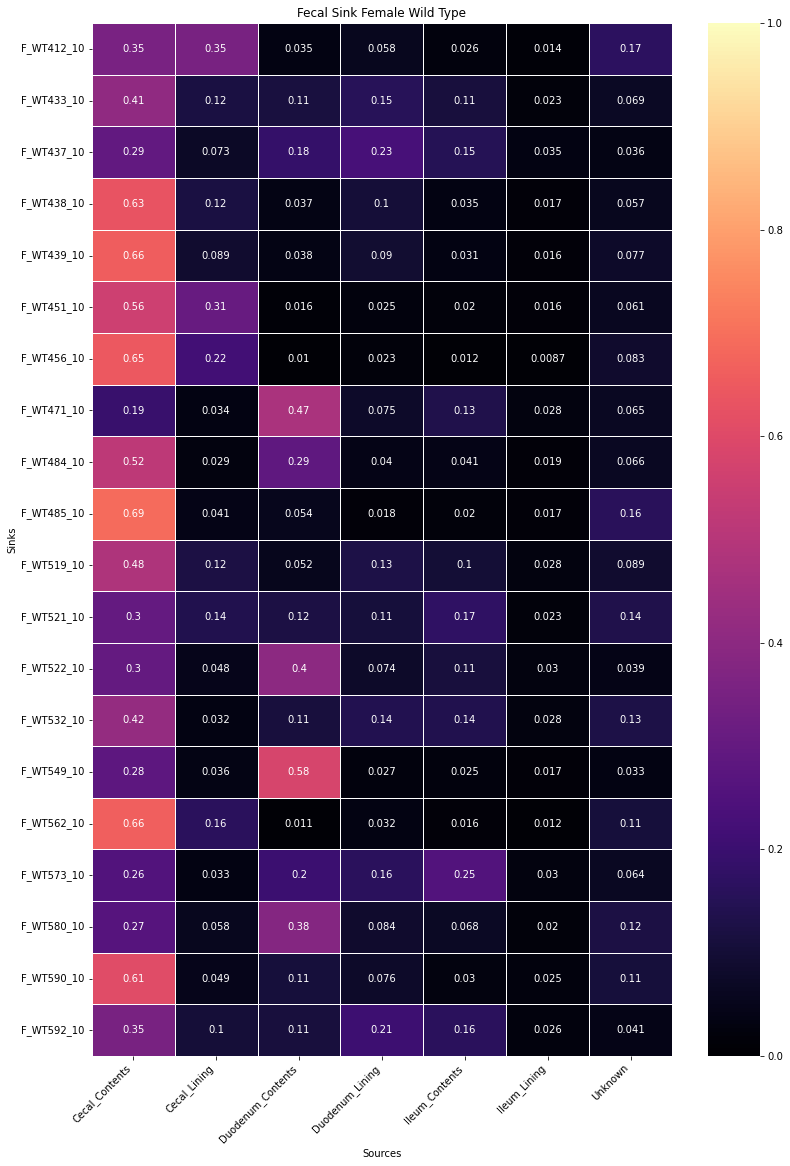

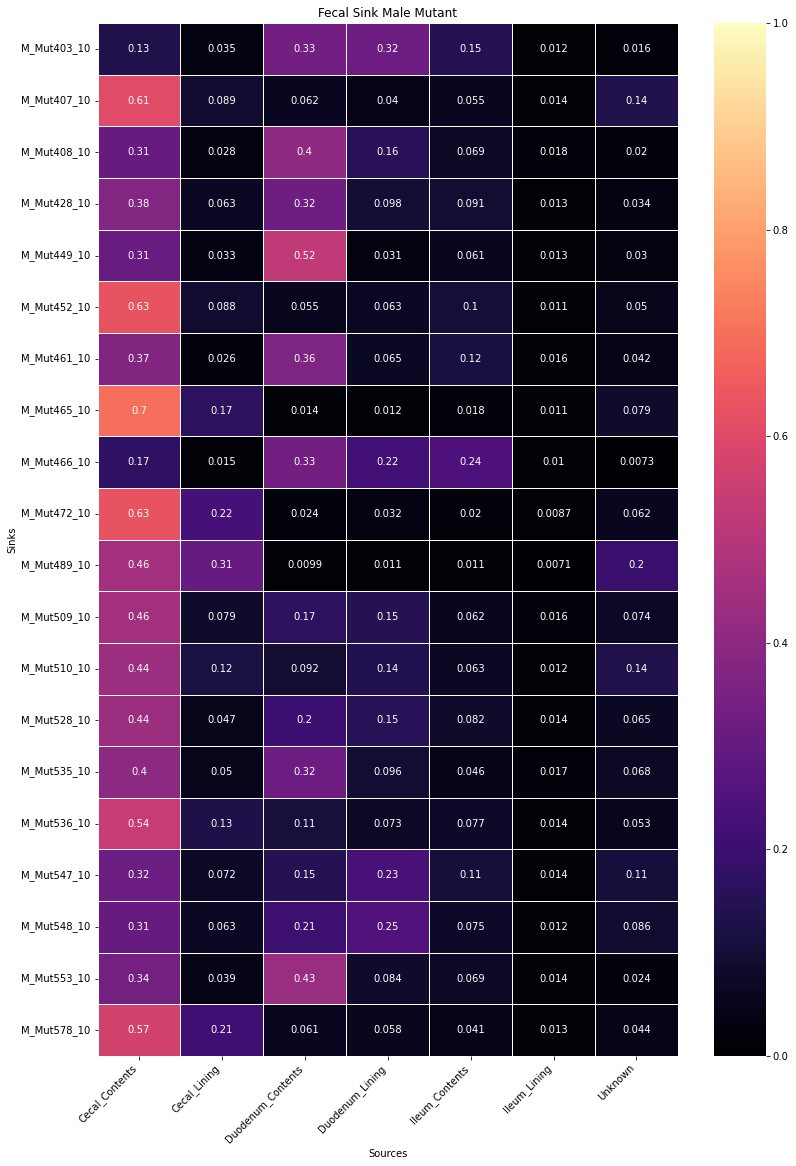

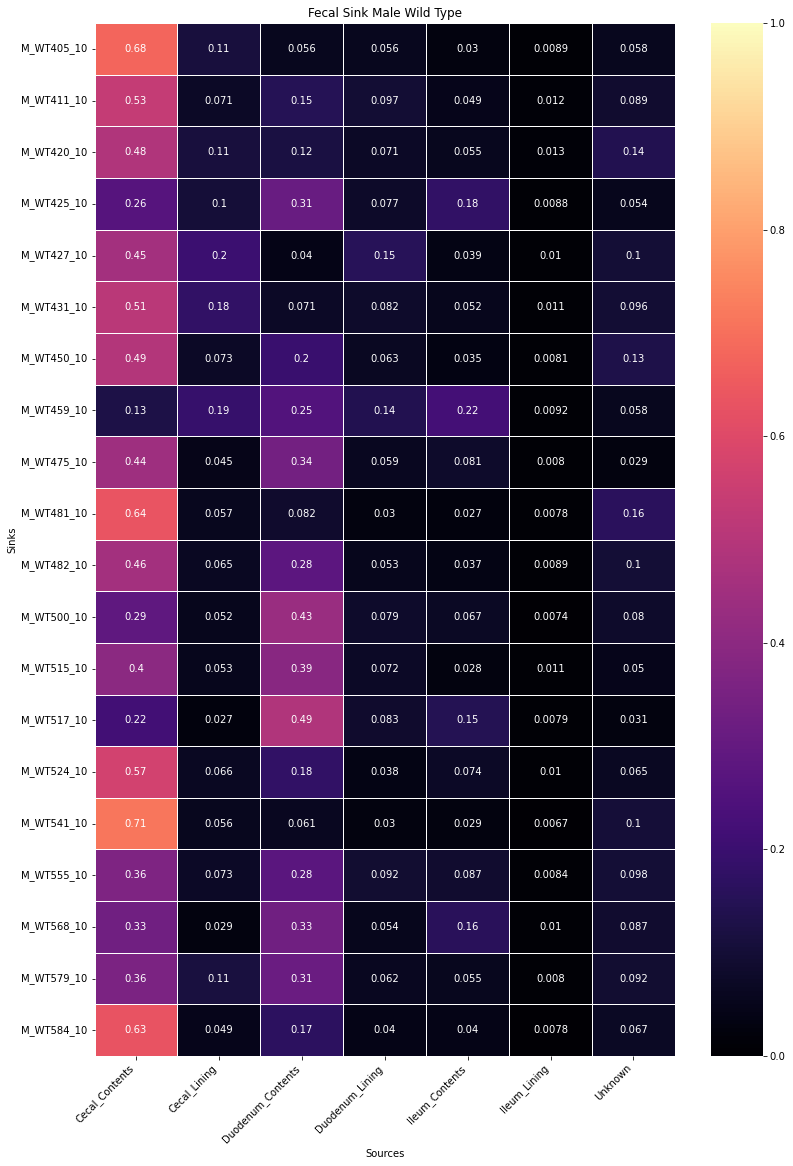

In [31]:
fecal_f_mut.ST_heatmap()
fecal_f_wt.ST_heatmap()
fecal_m_mut.ST_heatmap()
fecal_m_wt.ST_heatmap()

In [32]:
col_names=['SampleID','Cecal_Contents','Cecal_Lining','Duodenum_Contents','Duodenum_Lining',
           'Ileum_Contents','Ileum_Lining','Unknown']
tables=["C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_m_mut_200.txt",
        "C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_f_mut_200.txt",
        "C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_m_wt_200.txt",
        "C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_f_wt_200.txt"]
row_names=['Male Mutant','Female Mutant', 'Male Wild Type', 'Female Wild Type']
mpm=mpm_functions(tables)
mpm.display()
print(mpm.column_means())
feces_mean=mpm.combine_means(row_names=row_names,column_names=col_names)
feces_mean.to_csv("C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\feces_means.txt",sep='\t', index=True)
display(feces_mean)

,SampleID,Cecal_Contents,Cecal_Lining,Duodenum_Contents,Duodenum_Lining,Ileum_Contents,Ileum_Lining,Unknown
0,M_Mut403_10,0.133463,0.034897,0.334881,0.322968,0.145753,0.011549,0.016489
1,M_Mut407_10,0.605763,0.088512,0.061521,0.040025,0.055065,0.014070,0.135044
2,M_Mut408_10,0.306612,0.027754,0.402439,0.157502,0.068608,0.017500,0.019585
3,M_Mut428_10,0.375534,0.063271,0.324552,0.097821,0.091242,0.013454,0.034126
4,M_Mut449_10,0.309233,0.033258,0.522642,0.031209,0.060810,0.012740,0.030108
5,M_Mut452_10,0.629374,0.088208,0.054612,0.063495,0.103618,0.011108,0.049585
6,M_Mut461_10,0.371644,0.026237,0.364742,0.065202,0.115037,0.015548,0.041590
7,M_Mut465_10,0.698868,0.166484,0.014173,0.011569,0.018097,0.011497,0.079312
8,M_Mut466_10,0.172398,0.014793,0.333643,0.216879,0.244586,0.010357,0.007344
9,M_Mut472_10,0.628974,0.223482,0.024125,0.032349,0.020369,0.008663,0.062038


,SampleID,Cecal_Contents,Cecal_Lining,Duodenum_Contents,Duodenum_Lining,Ileum_Contents,Ileum_Lining,Unknown
0,F_Mut414_10,0.622589,0.072722,0.017673,0.144589,0.013367,0.011747,0.117313
1,F_Mut432_10,0.606137,0.109382,0.040840,0.084297,0.033726,0.023966,0.101652
2,F_Mut444_10,0.393556,0.082420,0.251758,0.121393,0.087981,0.025395,0.037497
3,F_Mut463_10,0.413985,0.092479,0.133718,0.269132,0.046816,0.020611,0.023259
4,F_Mut464_10,0.208891,0.075572,0.441384,0.031429,0.190849,0.014773,0.037102
5,F_Mut476_10,0.378592,0.117410,0.284440,0.066112,0.066847,0.025886,0.060713
6,F_Mut478_10,0.299624,0.124142,0.355042,0.061735,0.106015,0.020873,0.032569
7,F_Mut495_10,0.318445,0.044131,0.401832,0.031755,0.151891,0.018379,0.033567
8,F_Mut505_10,0.608005,0.071811,0.144942,0.058793,0.044115,0.029645,0.042689
9,F_Mut518_10,0.753952,0.074975,0.038793,0.027030,0.030209,0.020638,0.054403


,SampleID,Cecal_Contents,Cecal_Lining,Duodenum_Contents,Duodenum_Lining,Ileum_Contents,Ileum_Lining,Unknown
0,M_WT405_10,0.678850,0.112637,0.055586,0.056175,0.029726,0.008931,0.058095
1,M_WT411_10,0.532420,0.071293,0.148471,0.096654,0.049468,0.012425,0.089269
2,M_WT420_10,0.484628,0.112589,0.119748,0.071288,0.054812,0.013149,0.143786
3,M_WT425_10,0.264859,0.103216,0.312261,0.077445,0.179130,0.008766,0.054323
4,M_WT427_10,0.453206,0.202734,0.039804,0.154050,0.038775,0.010030,0.101401
5,M_WT431_10,0.510586,0.177880,0.070694,0.081790,0.051815,0.010745,0.096490
6,M_WT450_10,0.492522,0.072586,0.196526,0.062716,0.035083,0.008142,0.132425
7,M_WT459_10,0.125973,0.189318,0.254470,0.143349,0.219231,0.009230,0.058429
8,M_WT475_10,0.442542,0.044557,0.336409,0.058778,0.080604,0.007955,0.029155
9,M_WT481_10,0.635666,0.057201,0.082197,0.029822,0.026716,0.007837,0.160561


,SampleID,Cecal_Contents,Cecal_Lining,Duodenum_Contents,Duodenum_Lining,Ileum_Contents,Ileum_Lining,Unknown
0,F_WT412_10,0.353831,0.347873,0.035147,0.057988,0.025511,0.014147,0.165503
1,F_WT433_10,0.409529,0.117663,0.114060,0.154751,0.111439,0.023337,0.069221
2,F_WT437_10,0.293113,0.072816,0.184045,0.229770,0.149363,0.035121,0.035772
3,F_WT438_10,0.629626,0.119213,0.036650,0.104982,0.034840,0.017232,0.057457
4,F_WT439_10,0.658850,0.089053,0.037668,0.089872,0.031385,0.016480,0.076692
5,F_WT451_10,0.556504,0.306555,0.015598,0.024592,0.019666,0.016238,0.060847
6,F_WT456_10,0.647670,0.215920,0.009987,0.022914,0.011542,0.008719,0.083248
7,F_WT471_10,0.191472,0.033804,0.472063,0.075433,0.134208,0.028046,0.064974
8,F_WT484_10,0.518189,0.028921,0.287008,0.040496,0.040565,0.019033,0.065788
9,F_WT485_10,0.689941,0.041374,0.053566,0.017938,0.020164,0.016965,0.160052


None


,Cecal_Contents,Cecal_Lining,Duodenum_Contents,Duodenum_Lining,Ileum_Contents,Ileum_Lining,Unknown
SampleID,,,,,,,
Male Mutant,0.424586,0.094384,0.209291,0.114445,0.077823,0.012969,0.066502
Female Mutant,0.492337,0.108191,0.174253,0.078864,0.062693,0.020266,0.063396
Male Wild Type,0.446960,0.086346,0.226466,0.071733,0.074486,0.009211,0.084798
Female Wild Type,0.443368,0.107911,0.165957,0.092888,0.083002,0.021695,0.085179


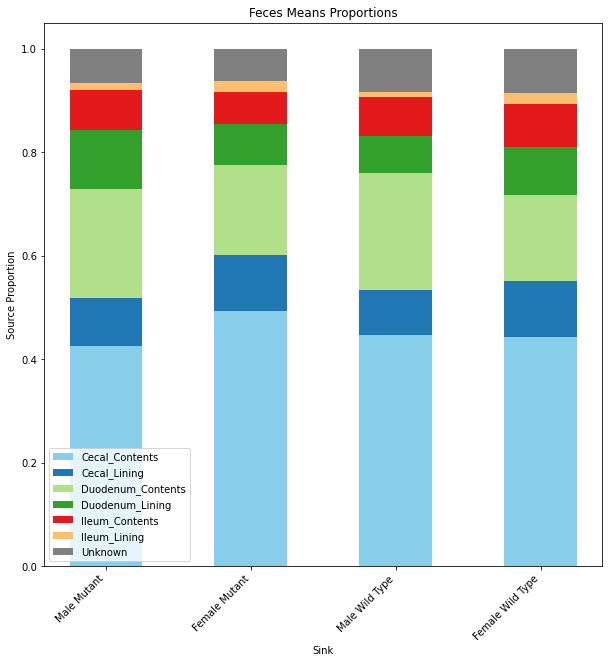

In [33]:
combined_feces=ST_graphs("C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\feces_means.txt",
                         title="Feces Means Proportions")
my_colors = ["skyblue", "#1F78B4","#B2DF8A","#33A02C" , "#E31A1C", "#FDBF6F","#808080"]
combined_feces.ST_Stacked_bar(coloring=my_colors)

In [35]:
tables1=["C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_m_mut_200.txt",
        "C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_f_mut_200.txt",
        "C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_m_wt_200.txt",
        "C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\fecal_full_f_wt_200.txt"]
output=comparing_multiple_groups(tables1,sink_names='Feces',mix=False)
file1 = open("C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\Fecal_0.95_CI.txt","w")
file1.write('Sink_Name'+'\t'+'Source_Name' +'\t'+ 'Low_CI'+'\t'+'High_CI'+'\n')
for i in range(0,len(output),3):
    file1.write(str(output[i])+'\t'+str(output[i+1])+'\t'+str(output[i+2][0])+'\t'+str(output[i+2][1])+'\n')
file1.close()
output1=comparing_multiple_groups(tables1,sink_names='Feces',mix=False,alpha=0.99)
file2 = open("C:\\Users\\andya\\Documents\\sourcetracker\\Laura Intestine Data\\Fecal_0.99_CI.txt","w")
file2.write('Sink_Name'+'\t'+'Source_Name' +'\t'+ 'Low_CI'+'\t'+'High_CI'+'\n')
for i in range(0,len(output1),3):
    file2.write(str(output1[i])+'\t'+str(output1[i+1])+'\t'+str(output1[i+2][0])+'\t'+str(output1[i+2][1])+'\n')
file2.close()

C:\Users\andya\AppData\Local\Temp\ipykernel_2512\2037481509.py:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  interval=st.t.interval(alpha=alpha, df=len(table[column])-1,
C:\Users\andya\AppData\Local\Temp\ipykernel_2512\2037481509.py:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  interval=st.t.interval(alpha=alpha, df=len(table[column])-1,
C:\Users\andya\AppData\Local\Temp\ipykernel_2512\2037481509.py:8: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  interval=st.t.interval(alpha=alpha, df=len(table[column])-1,
C:\Users\andya\AppData\Lo